# Intro
(This post is in progress!) The eighth post from a series of posts about my Masters project with the Physics Department at Durham University.

# Week Overview
This week I continued working on Spectrogram code. I improved the code from last week to allow for more functionality. I tested and plotted the results of different sampling rates on 650Hz and 600Hz waves. I then practiced creating animations to show how the superposition of two waves changes as their phase difference increases.

I also looked into resolving audio, in an attempt to separate out a superimposed wave into it's constituents, but realised simple methods likely won't work?

As initially advised by Robert and then helped by Stuart, I watched a statistical approach based Bioacoustic Data seminar. The most important part likely being about template based detection. It is a way to label soundscapes using mel frequency or Fourier spectrograms. TBD has a template, say a recording of a certain bird's song, then compares this template with a segment of a soundscape. If they are correlated above a threshold, then that event is labeled.

Lastly, I worked on the fast.ai lesson for this week.

# Meeting:

## During the meeting we discussed:


# Code

## SineWaveCreation Function
The first thing I did was work on a function that can create a sine wave for a given frequency, sampling rate, and length:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

def SineWaveCreation(Frequency,Sampling_Rate,TS_Len):
    # Creating a timeseries that contains the sample values 
    # that map onto a sine wave
    # This timeseries is one second long
    TS_OneSec = list(np.linspace(0,np.pi*2*Frequency,Sampling_Rate))
    # Multiplying the timeseries list to make it the desired length
    TS_Len = TS_OneSec*TS_Len
    # Transforming the timeseries with a sign function
    # and returning it 
    return(np.sin(TS_Len))

## Phase Addition
Modifying SineWaveCreation to allow for to plot with starting at a specified Phase.

In [ ]:
def SineWaveCreation(Frequency,Sampling_Rate,TS_Len,Phase=0):
    # Phase, in degrees, is the phase difference between the desired wave and 
    # a sine wave starting at the origin
    # 360 deg is 2pi radians
    # Radian = Degree * pi/180
    Phase = Phase * np.pi / 180
    TS_OneSec = list(np.linspace(0,np.pi*2*Frequency,Sampling_Rate))
    TS_Len = TS_OneSec*TS_Len
    TS_Len = np.array(TS_Len)
    return(np.sin(TS_Len+Phase))

Testing Creation with Phase Differences:

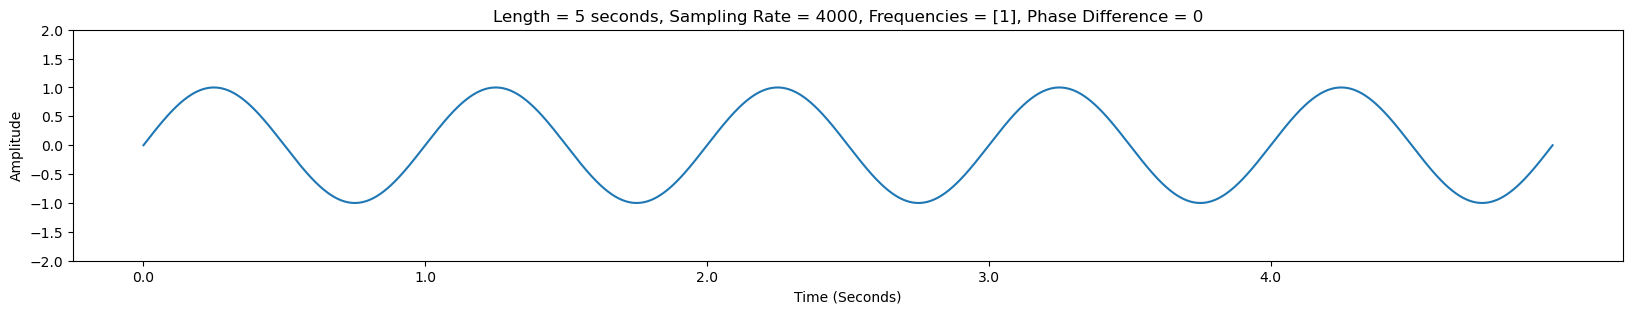

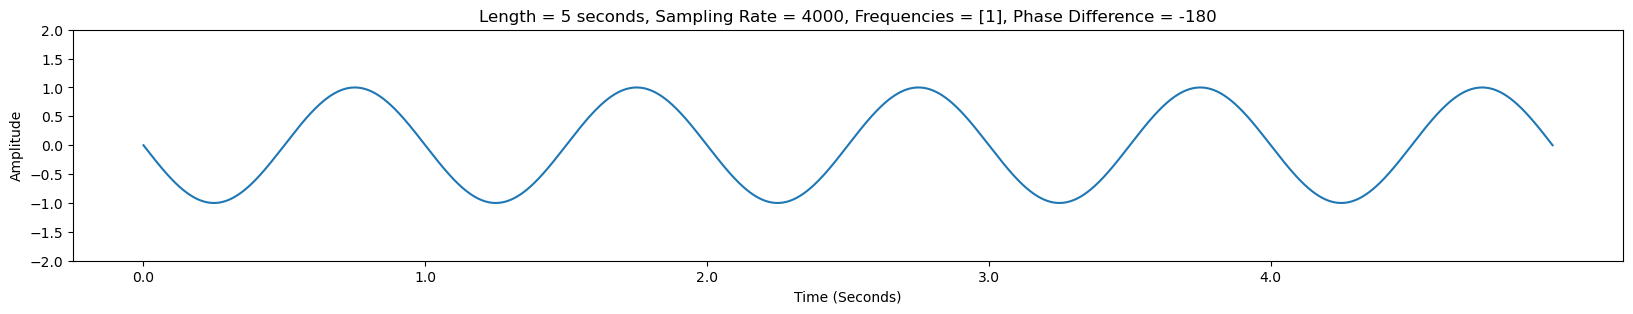

In [ ]:
Wave = SineWaveCreationPhase(1,Sampling_Rate,TS_Len,0)
WavePlotter(Wave,TS_Len,Sampling_Rate,[1])

Wave = SineWaveCreationPhase(1,Sampling_Rate,TS_Len,-180)
WavePlotter(Wave,TS_Len,Sampling_Rate,[1],-180)

Testing the lengths of the wave arrays:

In [ ]:
Sampling_Rate = 4000
TS_Len = 5

In [ ]:
FirstWave = SineWaveCreation(1,Sampling_Rate,TS_Len)
SecondWave = SineWaveCreation(2,Sampling_Rate,TS_Len)
len(FirstWave),len(SecondWave)

(20000, 20000)

Both wave arrays are 20000 long as expected. There are 5 seconds of 4000 samples, 5 * 4000 = 20000

Superimposing them is simply addition:

In [ ]:
CombinedWave = FirstWave + SecondWave

# WavePlotter Function

I created a function WavePlotter. <br>
WavePlotter takes in a wave array, it's length, its sampling rate, an (array storing) it's frequency, and it's phase.

In [ ]:
def WavePlotter(Wave,Length,Sampling_Rate,Frequencies,Phase=0):   
    # Plotting:
    plt.figure(figsize=(20,3))
    plt.plot(Wave)
    plt.xticks(np.arange(0,len(Wave),Sampling_Rate),
               np.arange(0,len(Wave)/Sampling_Rate,1))
    plt.ylim((-2,2))

    # Labelling:
    plt.ylabel("Amplitude")
    plt.xlabel("Time (Seconds)")
    plt.title("Length = {} seconds, Sampling Rate = {}, Frequencies = {}, Phase = {}".format(Length, Sampling_Rate, Frequencies,Phase))
    plt.show()  

For the first 1Hz wave:

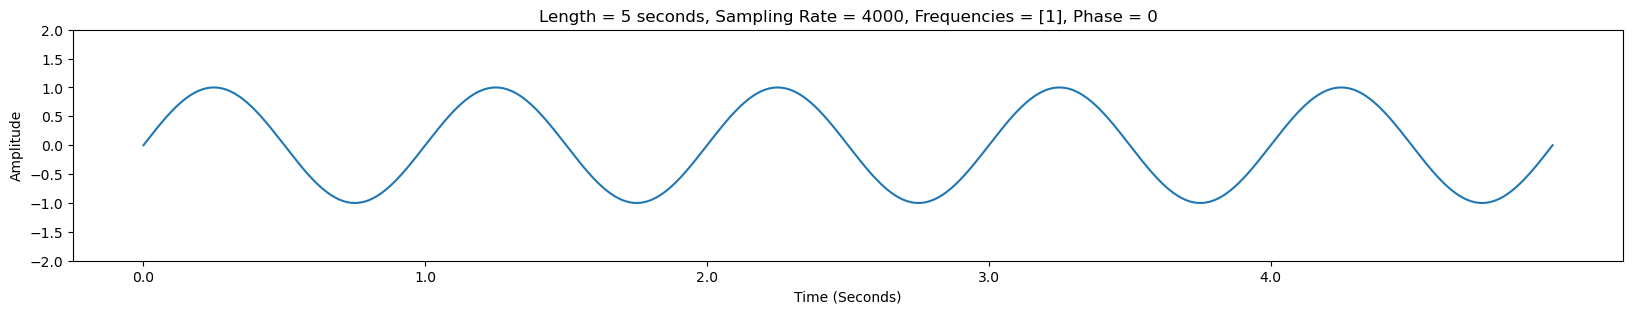

In [ ]:
WavePlotter(FirstWave,TS_Len,Sampling_Rate,[1])

For the second 2Hz wave:

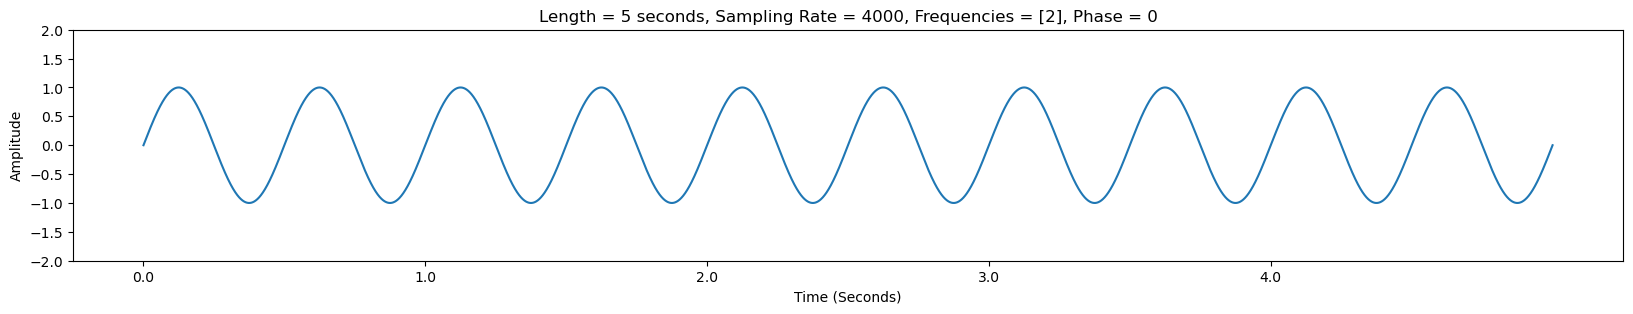

In [ ]:
WavePlotter(SecondWave,TS_Len,Sampling_Rate,[2])

For their superposition:

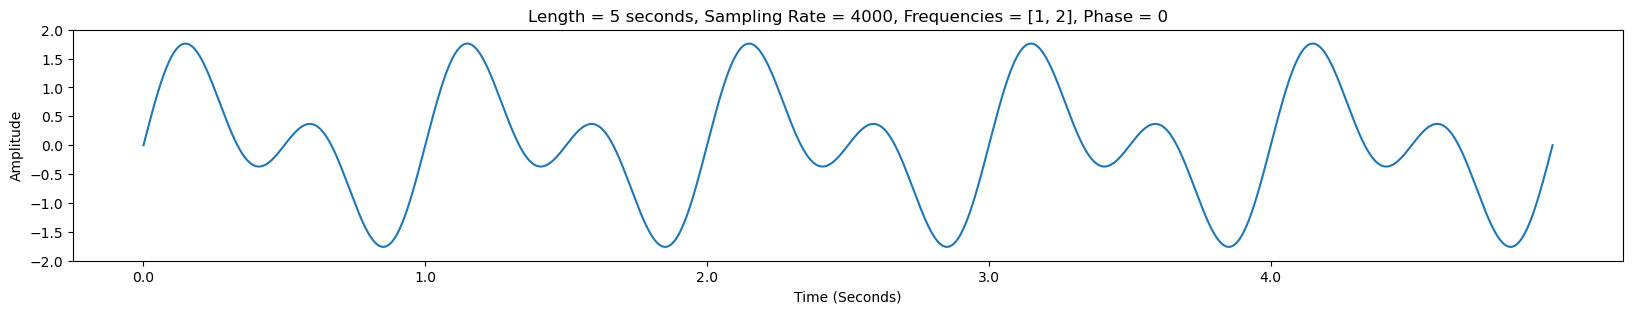

In [ ]:
WavePlotter(CombinedWave,TS_Len,Sampling_Rate,[1,2])

# SineWaveCreation and WavePlotter combined Function

WaveCreationPlotter has the functionality of both the previous functions.

It takes three parameters, WaveInfoList, Combined, and (whether to) Plot.

To create and plot a single wave: <br>
WaveInfoList = [[Frequency,Length,Samplingrate]] <br>
Combined = False

To create and plot a superposition of two waves: <br>
WaveInfoList = [[Frequency1,Length1,Samplingrate1],[Frequency2,Length2,Samplingrate2]] <br>
Combined = True

To create and plot multiple waves individually:
WaveInfoList = [[Frequency1,Length1,Samplingrate1],[Frequency2,Length2,Samplingrate2]] <br>
Combined = False

The function returns a list of wave arrays WaveList, with WaveList[0] being the first wave array. If Combined = True, WaveList[0] is simply the superimposed wave. If Combined = False, WaveList[i] is the first wave, then the second wave etc.

In [ ]:
def WaveCreationPlotter(WaveInfoList,Combined,Plot=True):
    WaveList = []
    Frequencies = []
    PhaseList = []
    for i in range(len(WaveInfoList)):
        Frequency = WaveInfoList[i][0]
        Frequencies.append(Frequency)
        Length = WaveInfoList[i][1]
        Sampling_Rate = WaveInfoList[i][2]
        try:
            Phase = WaveInfoList[i][3]
            PhaseList.append(Phase)
        except IndexError:
            Phase = 0
            PhaseList.append(Phase)
        Wave = SineWaveCreation(Frequency,Sampling_Rate,Length,Phase)
        WaveList.append(Wave)
    if Combined == False:
        if Plot==True:
            for i in range(len(WaveList)):       
                WavePlotter(WaveList[i],Length,Sampling_Rate,Frequencies[i],PhaseList[i])
        return WaveList
    else:
        # Just getting the sampling rate of one of the waves
        # This should be fine as long as the sampling rate of both waves is the same
        (x) = WaveList[0].shape
        CombinedWave = np.zeros(x)
        for Wave in WaveList:
            CombinedWave = CombinedWave + Wave
        if Plot==True:
            WavePlotter(CombinedWave,Length,Sampling_Rate,Frequencies,PhaseList) 
        return [CombinedWave]

Examples:

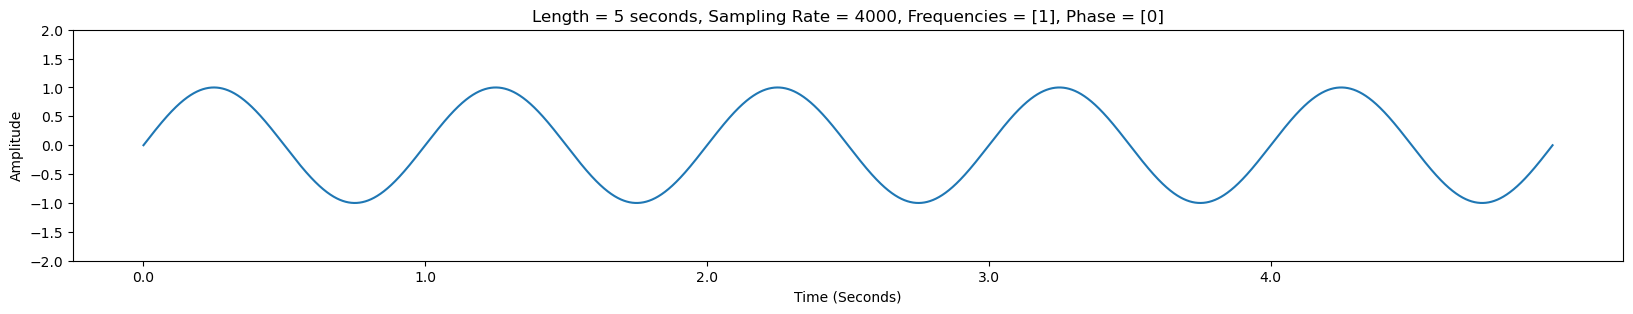

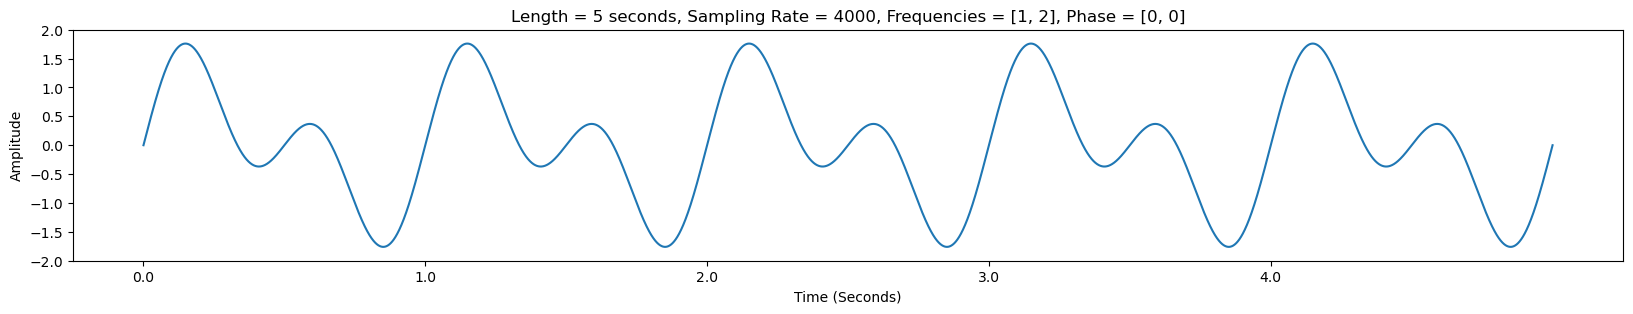

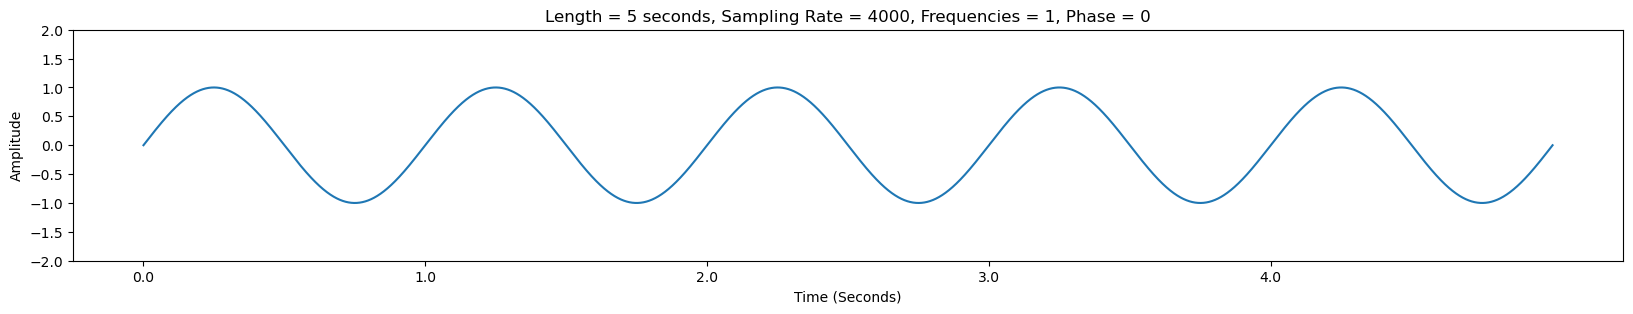

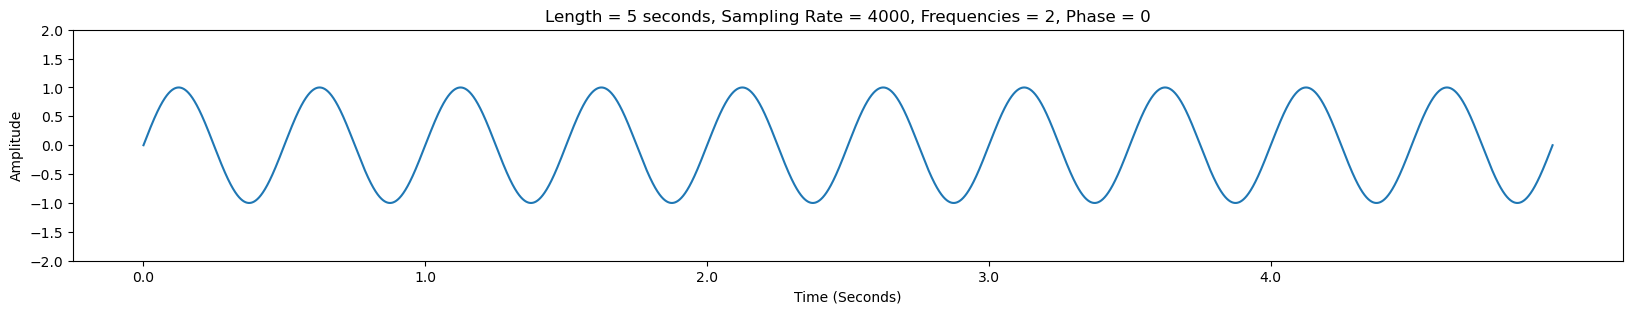

In [ ]:
# 1Hz, 5 Seconds, 4000 sampling rate
WaveInfoList = [[1,5,4000]]
WaveOne = WaveCreationPlotter(WaveInfoList,True)

# 1Hz, 5 Seconds, 4000 sampling rate superposition with 2Hz, 5 Seconds, 4000 sampling rate
WaveInfoList = [[1,5,4000],[2,5,4000]]
WCPSW = WaveCreationPlotter(WaveInfoList,True)

# 1Hz, 5 Seconds, 4000 sampling rate
# 2Hz, 5 Seconds, 4000 sampling rate, separately
WaveInfoList = [[1,5,4000],[2,5,4000]]
WCPSW = WaveCreationPlotter(WaveInfoList,False)

# Testing Sampling rate.
This is done for 600Hz and 650Hz waves.

## Sr=4000
If the sampling rate is high, say 4000, both looks like blocks.

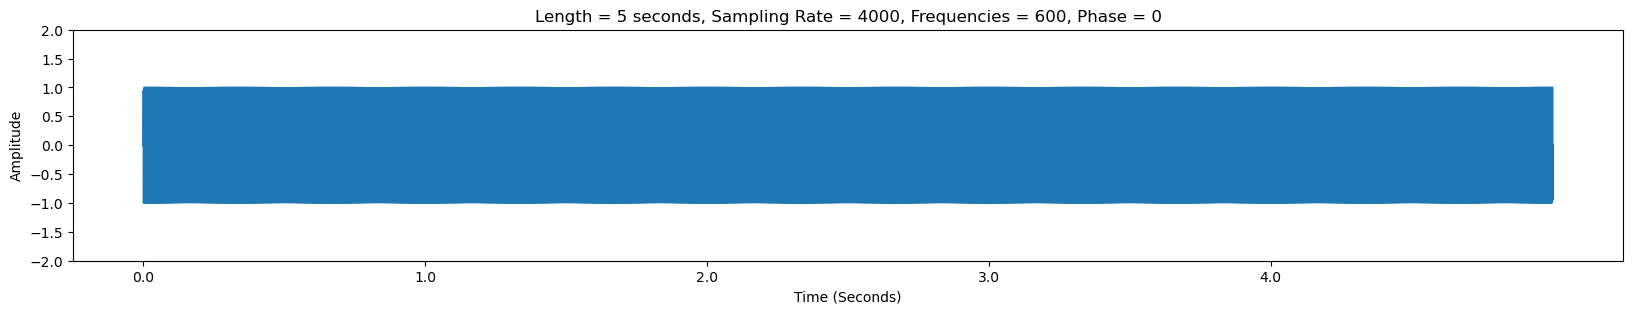

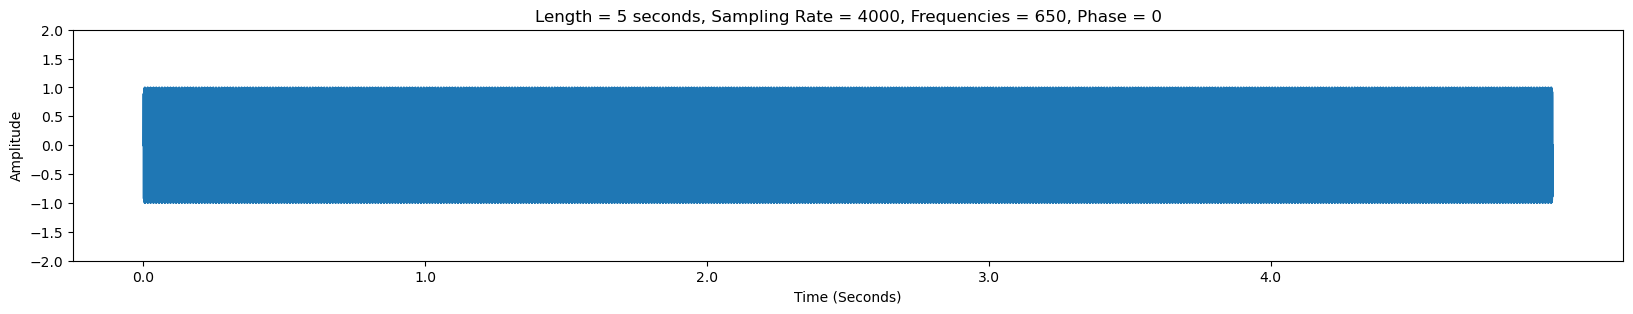

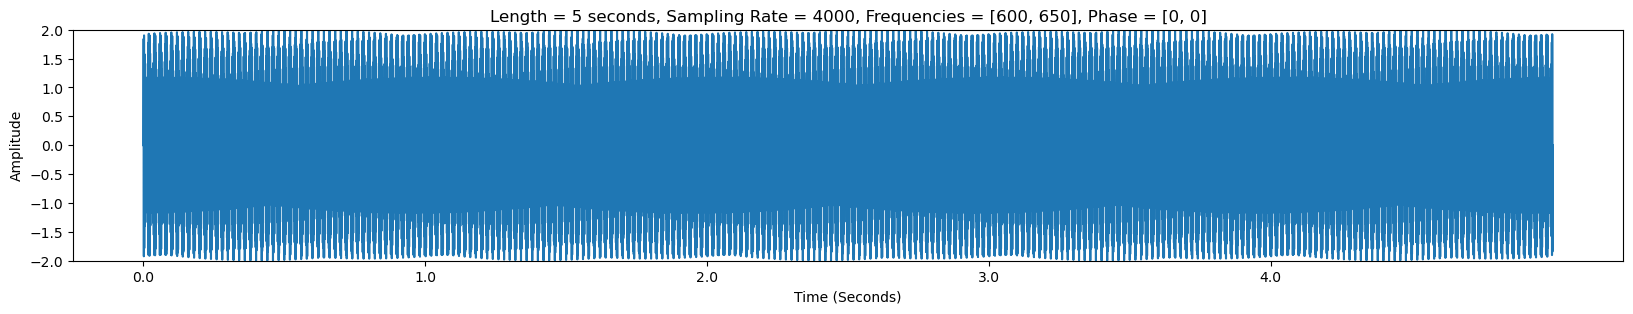

In [ ]:
SR = 4000
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Sr=1300
If it is set to twice the maximum frequency, 650 * 2 = 1300:

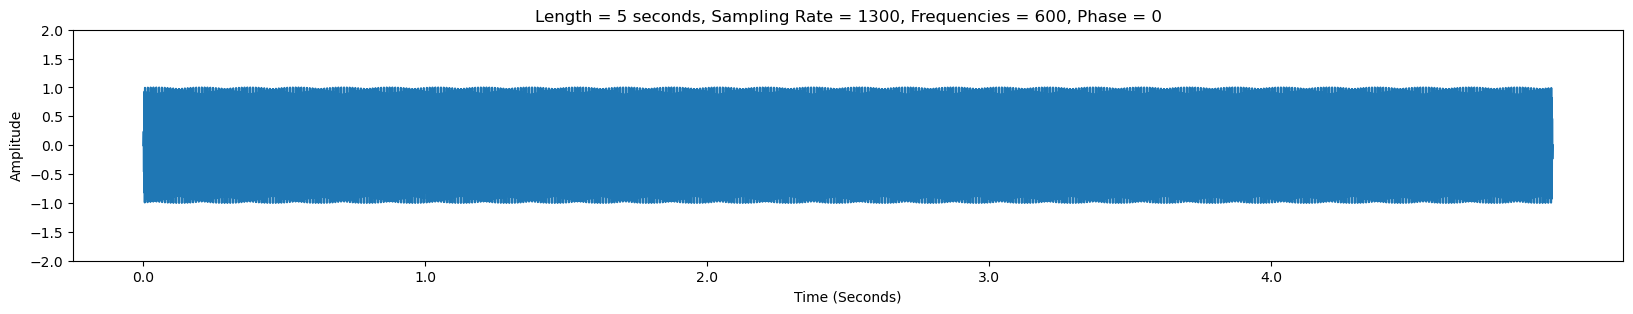

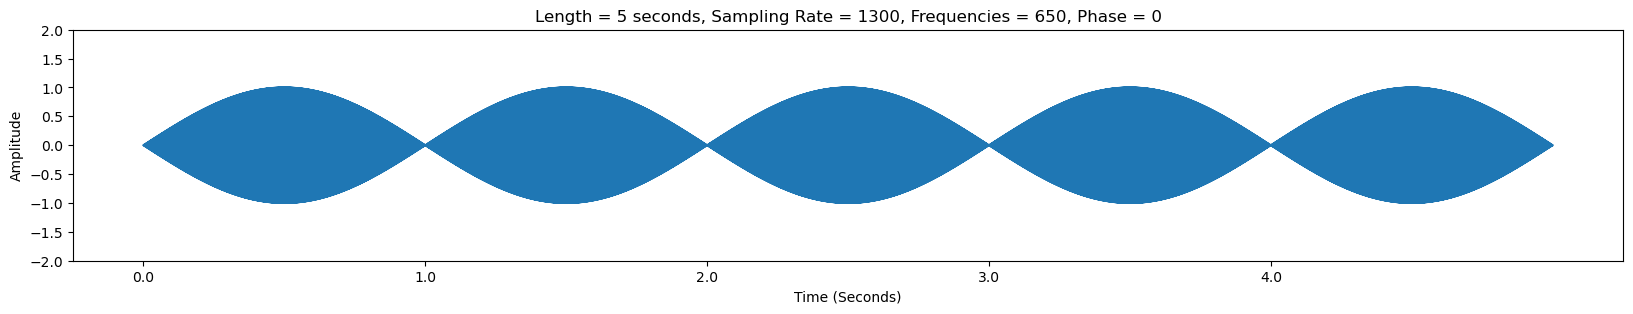

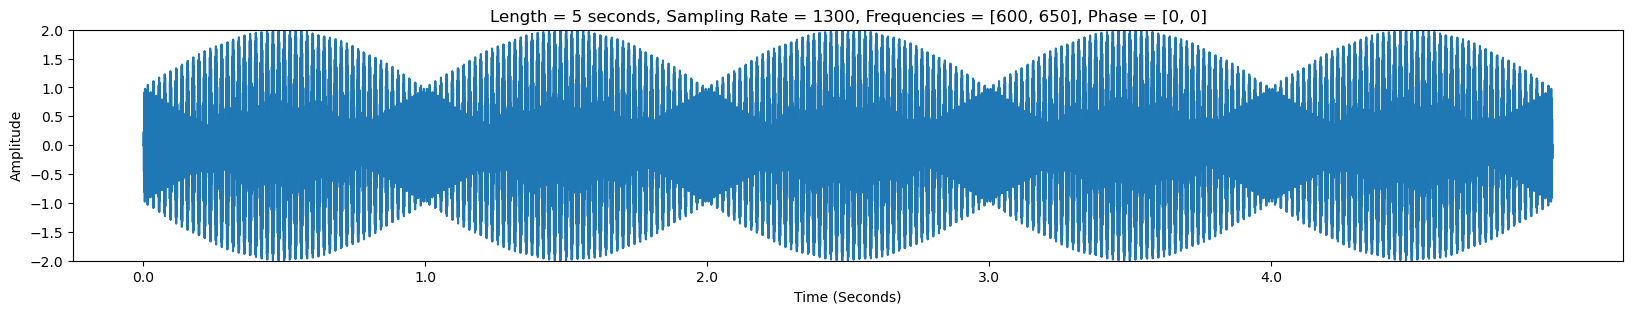

In [ ]:
SR = 1300
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Sr=600
If it's set to the value of the first wave:

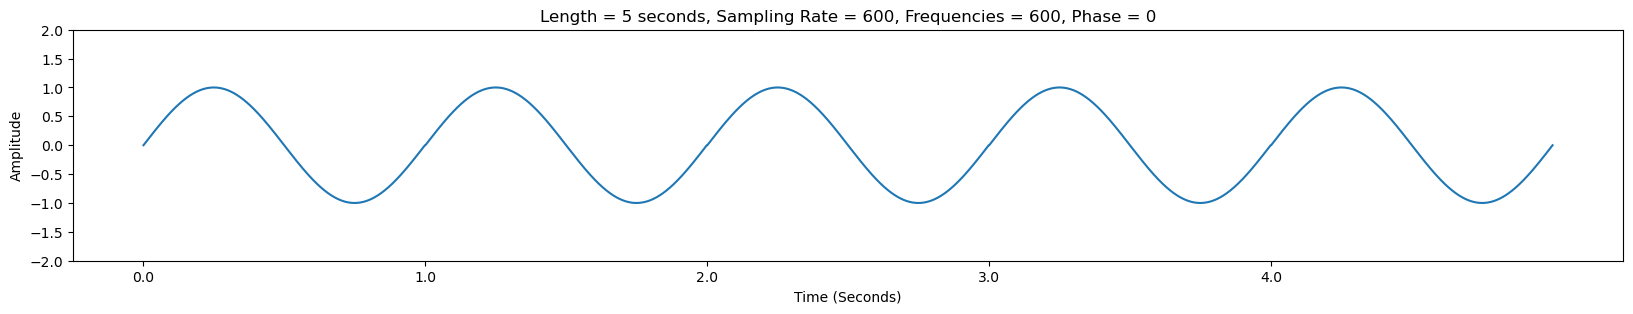

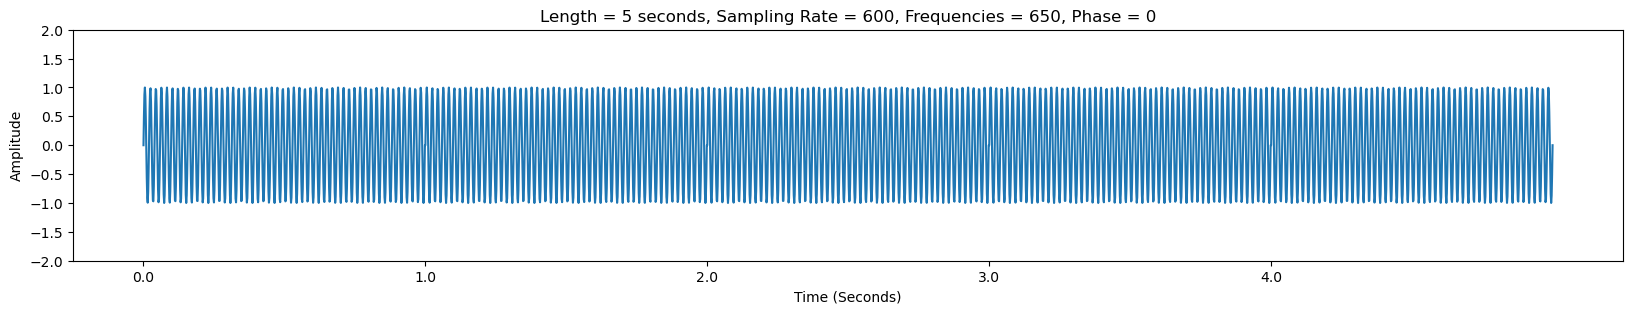

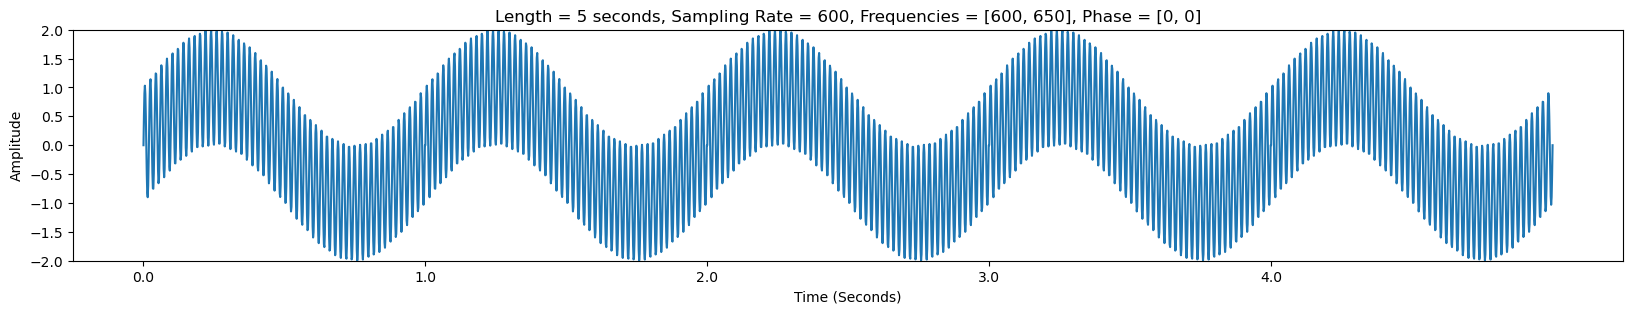

In [ ]:
SR = 600
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Sr=650
If it's set to the value of the second wave:

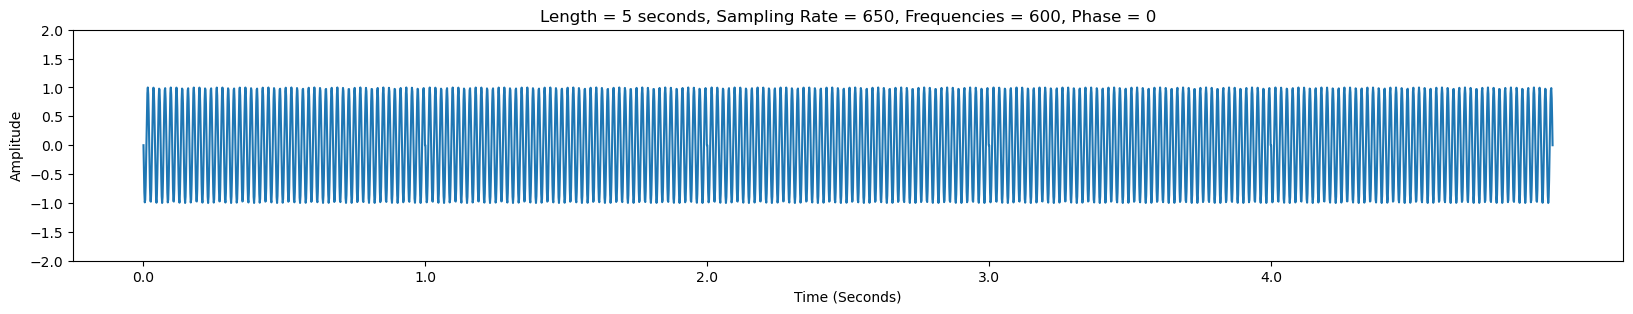

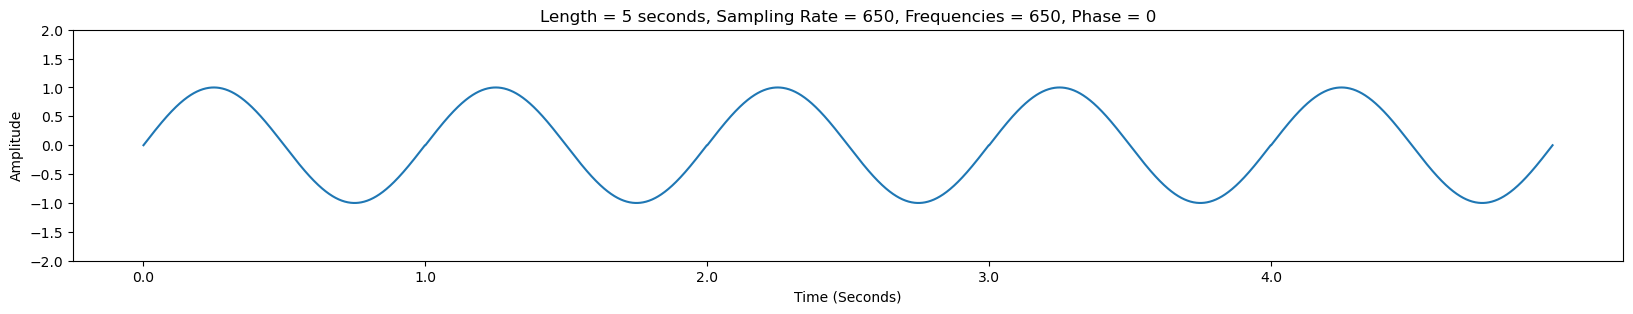

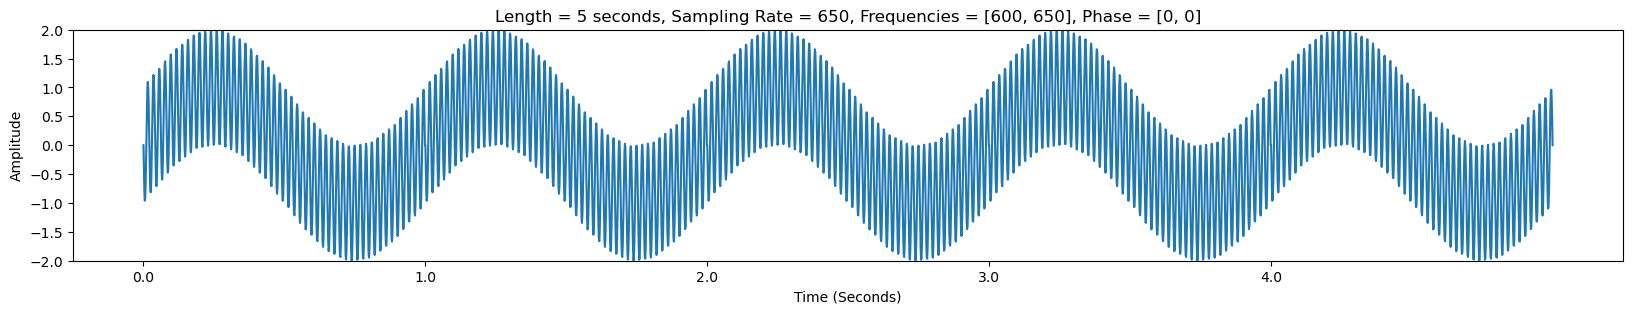

In [ ]:
SR = 650
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Sr=1
If it's set to 1

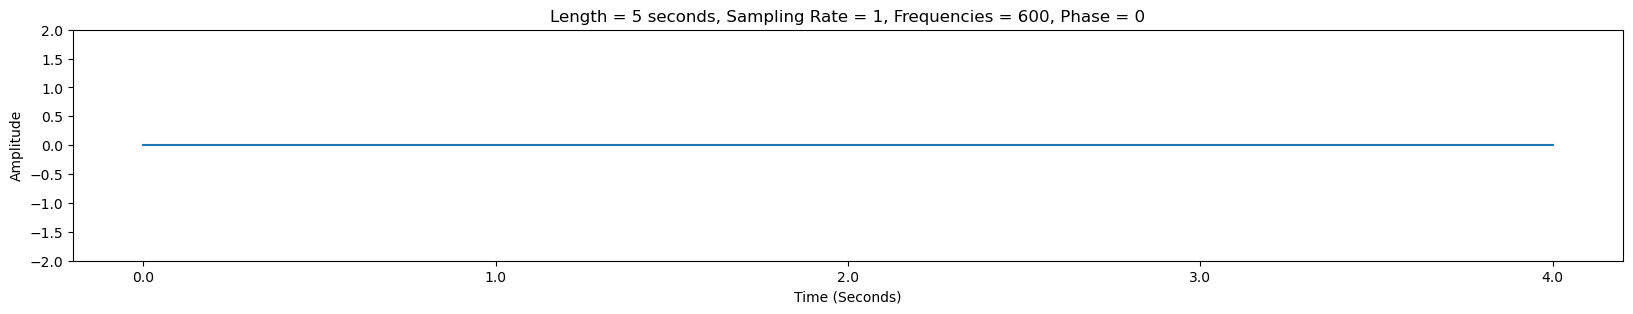

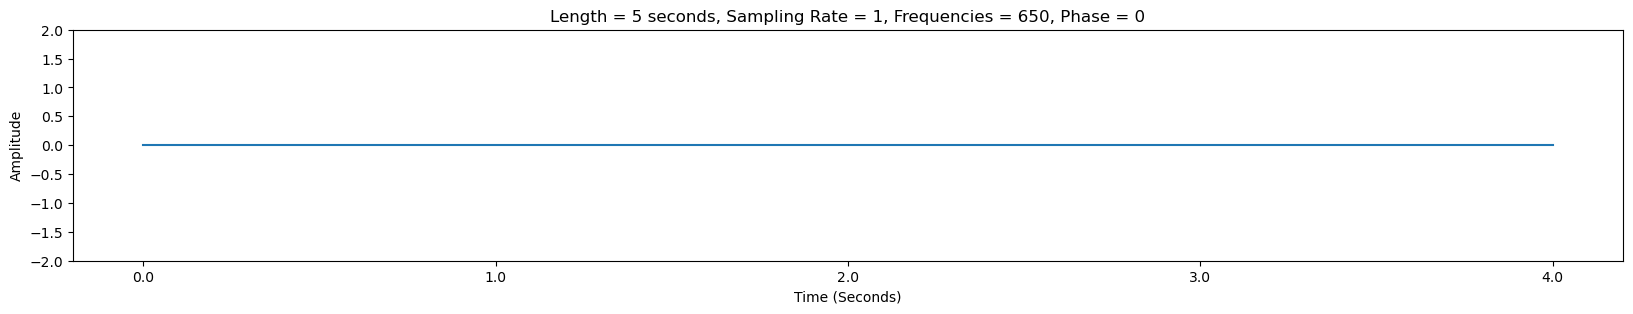

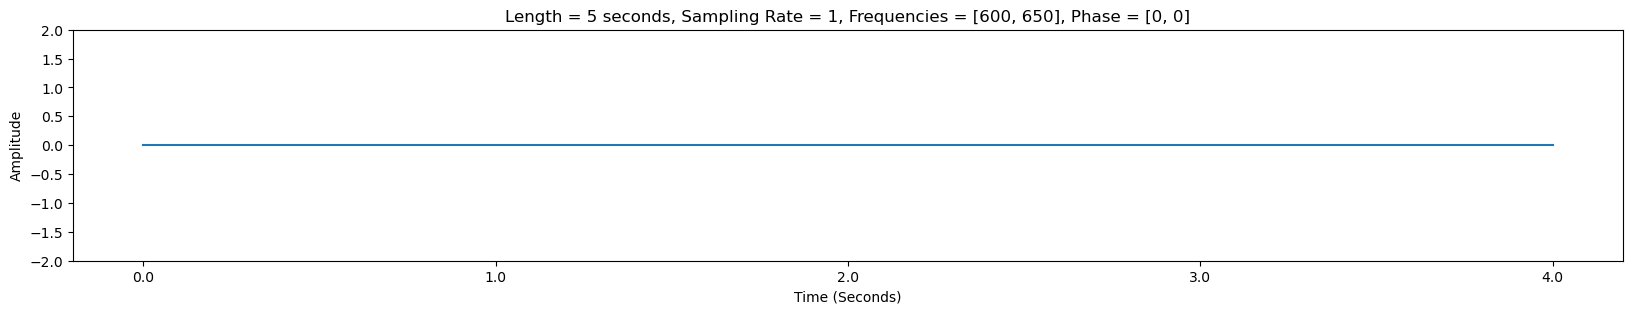

In [ ]:
SR = 1
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Sr=100
If it's set to 100

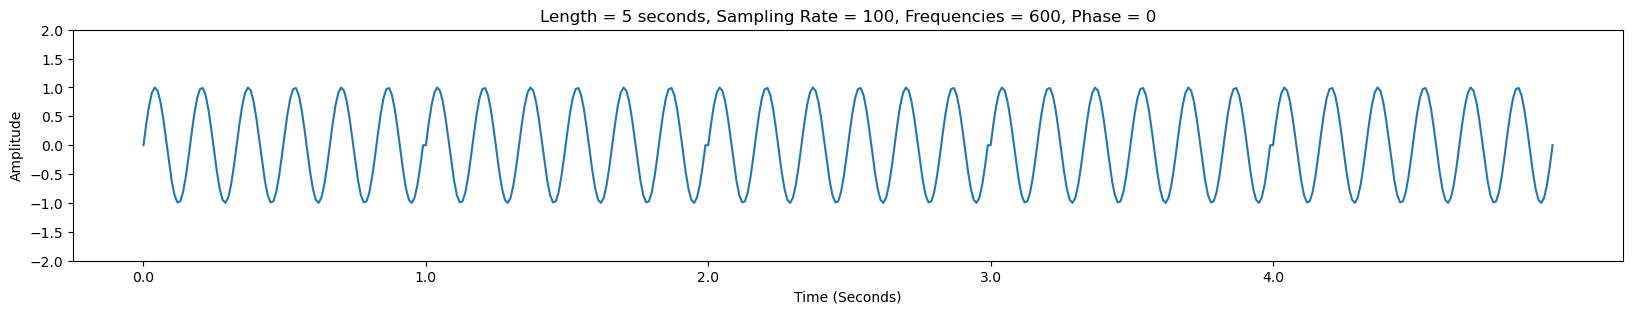

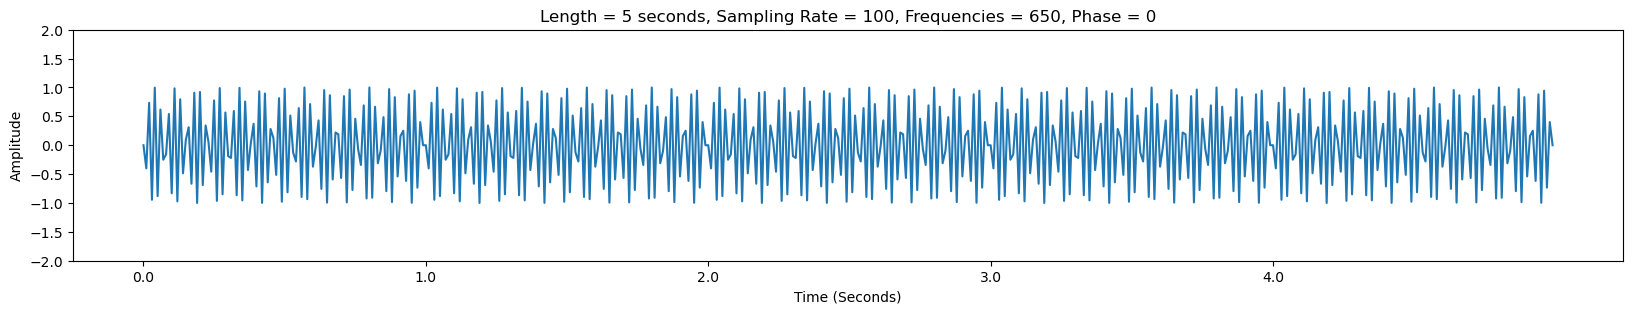

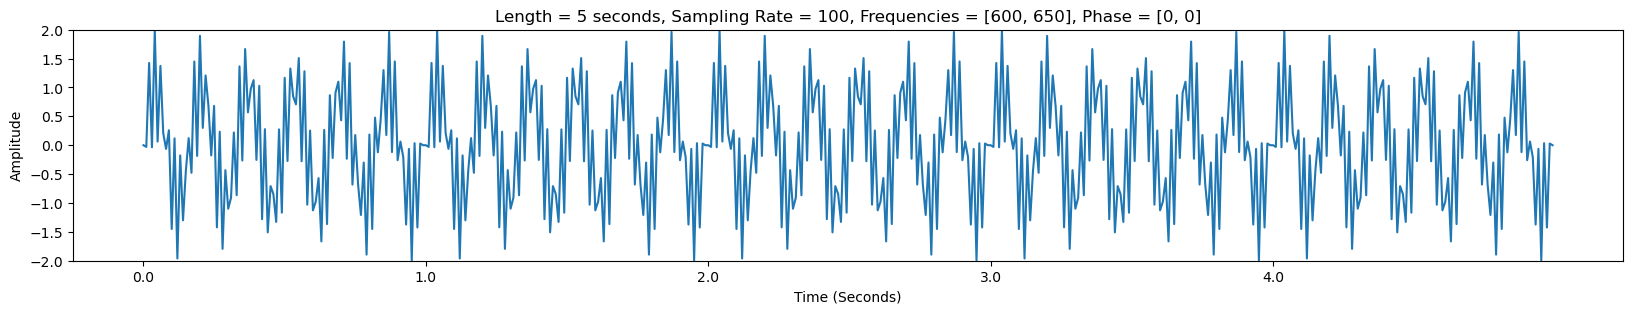

In [ ]:
SR = 100
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

## Test Value
Modify SR to different values for testing.

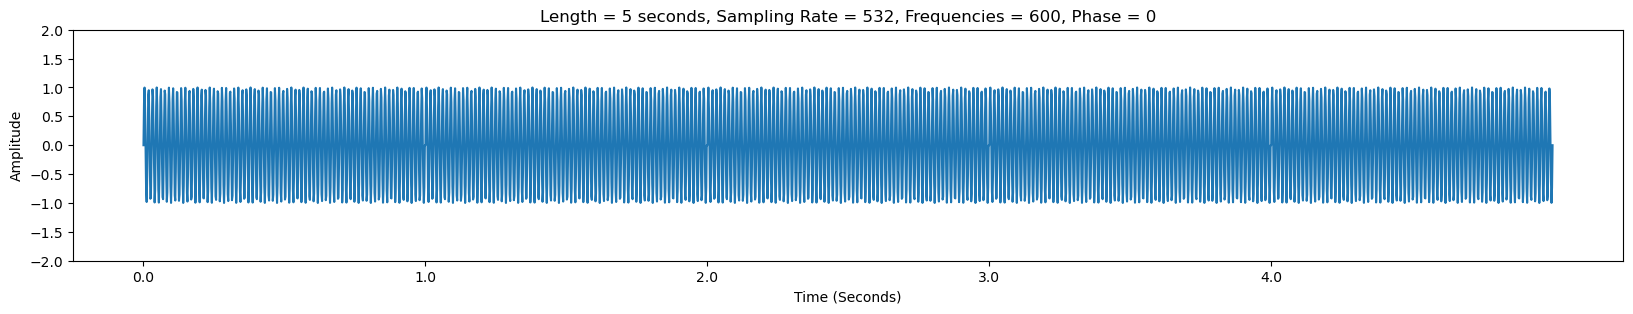

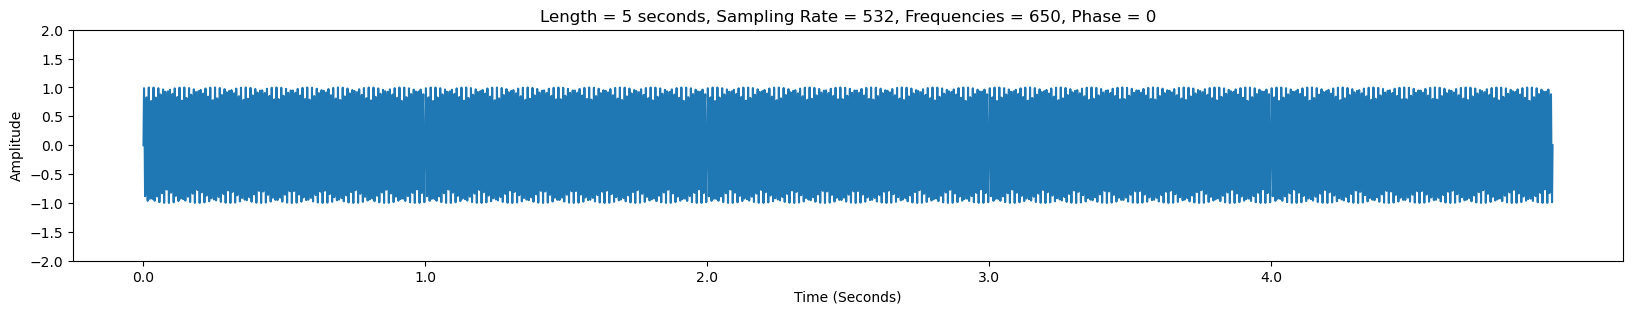

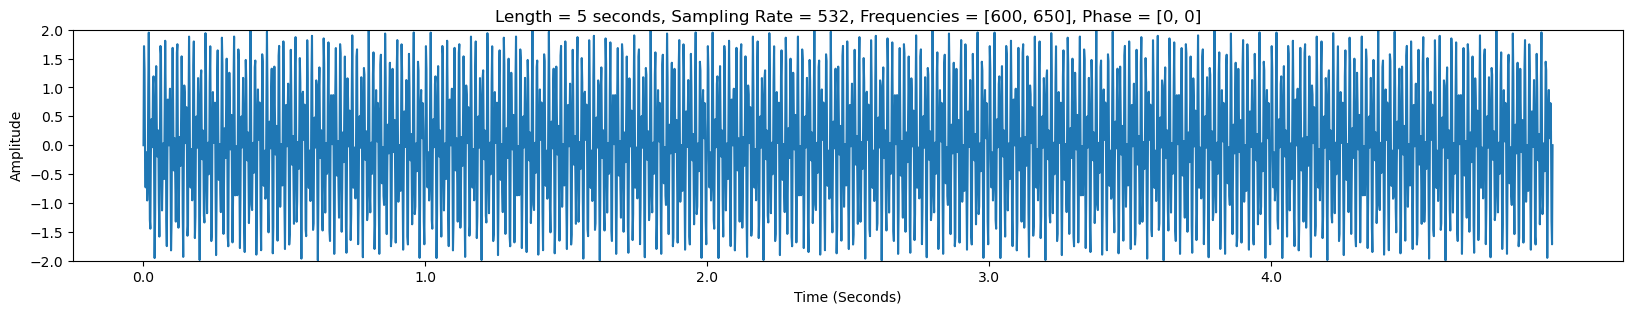

In [ ]:
SR = 532
WaveInfoList = [[600,5,SR],[650,5,SR]]
(Wave1,Wave2) = WaveCreationPlotter(WaveInfoList,False)
CombinedWave = WaveCreationPlotter(WaveInfoList,True)

# Resolving Waves
This problem is known as time Series Decomposition, or Decomposing signals in components (matrix factorization problems).

Scikit-learn has many methods described for it here https://scikit-learn.org/stable/modules/decomposition.html#independent-component-analysis-ica. 

A brief look online showed another method, Empirical Mode Decomposition (EMD).

It is not trivial to know which method is best to try because of the complexity of the different methods. For instance, looking at the Scikit-learn page, the each algorithm is quite mathematical. To understand them I would have to self study more linear algebra, using say the fast.ai LA course. 

Going back to the Computational Bioacoustics literature review, signal decomposition was usually done (indirectly?) by converting the signal to a spectrogram (using Fourier Transforms).

While researching, I found an interesting blog about the limitations of spectrograms and CNNs for audio processing. https://towardsdatascience.com/whats-wrong-with-spectrograms-and-cnns-for-audio-processing-311377d7ccd

I also found a student paper detailing the CNN approach http://noiselab.ucsd.edu/ECE228_2019/Reports/Report38.pdf

Lastly, the paper
"Comparison of Pre-Trained CNNs for Audio Classification
Using Transfer Learning" is very useful. It details the different pretrained models available and how to retrain them for spectrogram classification. In particular, under the transfer learning section, it details useful steps.

# Animations

## Simple Animation
As a simple test, I plotted a red sine wave, then a green one, and then their superposition as a blue wave.

In [ ]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
WaveAnimationDict = {}

def one_frame(d,WaveInfoList):
    global WaveAnimationDict
    #print(WaveInfoList)
    # d is the frame number, passed automatically
    # The first time running, d=0
    
    # one_frame iterates through frames with d
    # For d=0, I want the 1Hz wave to be plotted
    # For d=1, I want the 2Hz wave to be plotted
    # For d=2, I want the superposition to be plotted
    
    #print(d)
    # clear the axis we created before running this function
    ax.clear() 
    
    # Turn WaveInfo into WaveArrays
    if d==0:
        WaveInfoList = np.array([WaveInfoList[0]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='red')
        
    elif d==1:
        WaveInfoList = np.array([WaveInfoList[1]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='green')
        
    elif d==2:
        WaveList = WaveCreationPlotter(WaveInfoList,True,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='blue')
    

    WaveAnimationDict[str(d)] = Wave
    
    # create dictionary. it stores frame number and wave.
    # we can do different keys for wave1, wave2, and wave3
     
    # Plotting each frame
    ax.set_xticks(np.arange(0,len(Wave),Sampling_Rate),
               np.arange(0,len(Wave)/Sampling_Rate,1))
    ax.set_ylim((-2,2))
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (Seconds)")
    ax.set_title("Simple Superposition Animation")

In [ ]:
WaveInfoList = [[1,5,4000],[2,5,4000]]
fig,ax = plt.subplots()
animation = FuncAnimation(fig, one_frame, frames=3, fargs = (WaveInfoList, ), interval=500, repeat=True)
# frame is the number of times to run one_frame
# interval is the number of miliseconds between frames
plt.close()
HTML(animation.to_jshtml())

Now doing the same, but displaying the waves on the same frame.

In [ ]:
WaveAnimationDict = {}

def one_frame(d,WaveInfoList):
    global WaveAnimationDict
    #print(WaveInfoList)
    #print(d)
    ax.clear() 
    
    # Certain code for the first three iterations
    if d==0:
        WaveInfoList = np.array([WaveInfoList[0]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='red')
        
    elif d==1:
        WaveInfoList = np.array([WaveInfoList[1]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='green')
        ax.plot(WaveAnimationDict['0'],color='red')
        
    elif d==2:
        WaveList = WaveCreationPlotter(WaveInfoList,True,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='blue')
        ax.plot(WaveAnimationDict['0'],color='red')
        ax.plot(WaveAnimationDict['1'],color='green')
    
    WaveAnimationDict[str(d)] = Wave
    
    # Plotting each frame
    ax.set_xticks(np.arange(0,len(Wave),Sampling_Rate),
               np.arange(0,len(Wave)/Sampling_Rate,1))
    ax.set_ylim((-2,2))
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (Seconds)")
    ax.set_title("Simple Superposition Animation 2")

In [ ]:
WaveInfoList = [[1,5,4000],[2,5,4000]]
fig,ax = plt.subplots()
animation = FuncAnimation(fig, one_frame, frames=3, fargs = (WaveInfoList, ), interval=1000, repeat=True)
plt.close()
HTML(animation.to_jshtml())

## Phase Difference Animation

Wave1, red, stays the same. <br>
Wave2, green, moves to the right (as phase difference increases). <br>
Wave3, blue, is the superposition of both. <br>

In [ ]:
WaveAnimationDict = {}

def one_frame(d,WaveInfoList,PhaseDiff,PhaseInc):
    global WaveAnimationDict
    ax.clear() 
    # Certain code for the first three iterations/frames
    if d==0:
        WaveInfoList = np.array([WaveInfoList[0]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='red')
    elif d==1:
        WaveInfoList = np.array([WaveInfoList[1]])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='green')
        ax.plot(WaveAnimationDict['0'],color='red')
    elif d==2:
        WaveList = WaveCreationPlotter(WaveInfoList,True,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='blue')
        ax.plot(WaveAnimationDict['0'],color='red')
        ax.plot(WaveAnimationDict['1'],color='green')
    else: # For the fouth and onwards iterations/frames
        PhaseDiff = PhaseDiff + (d-2)*PhaseInc
        # The first wave stays the same
        ax.plot(WaveAnimationDict['0'],color='red')
        # The second wave is recalculated with PhaseDiff
        PWaveInfoList = WaveInfoList[1].copy()
        if len(WaveInfoList[1]) == 3:
            PWaveInfoList.append(PhaseDiff)
        else:
            PWaveInfoList[3] = PWaveInfoList[3] + (d-2)*PhaseInc
        WaveInfoList = np.array([PWaveInfoList])
        WaveList = WaveCreationPlotter(WaveInfoList,False,False)
        Wave = WaveList[0]
        ax.plot(Wave,color='green')
        # The third wave is recalculated as the new superposition of the previous 2
        CombinedWave = WaveAnimationDict['0'] + Wave
        ax.plot(CombinedWave,color='blue')
    
    WaveAnimationDict[str(d)] = Wave
    
    # Plotting each frame
    ax.set_xticks(np.arange(0,len(Wave),Sampling_Rate),
               np.arange(0,len(Wave)/Sampling_Rate,1))
    ax.set_ylim((-2,2))
    ax.set_ylabel("Amplitude")
    ax.set_xlabel("Time (Seconds)")
    ax.set_title("Phase Difference = {}".format(PhaseDiff))

In [ ]:
# Initial Phase Difference
PhaseDiff = -180
# Phase difference increments by frame
PhaseInc = -10

WaveInfoList = [[1,5,4000],[1,5,4000,PhaseDiff]]
fig,ax = plt.subplots()
animation = FuncAnimation(fig, one_frame, frames=39, fargs = (WaveInfoList, PhaseDiff, PhaseInc), interval=250, repeat=True)
plt.close()
HTML(animation.to_jshtml())

# Statistical Methods Webinar

The Webinar 'Statistical Methods Series: Species Archetype Models & Regions of Common Profile Models' can be found at https://www.youtube.com/watch?v=dYlkDCUTbAs.

The lecture used R. It covers different tools and packages for acoustic data analysis. A (up to date) Python version could be useful.

## Common research questions
What is an 'acoustic' community in a habit? <br>
What transmission properties of the environment shaped signal structure? <br>
How animal acoustic signals vary in space and time? <br>

## Acoustic Analysis Workflow:
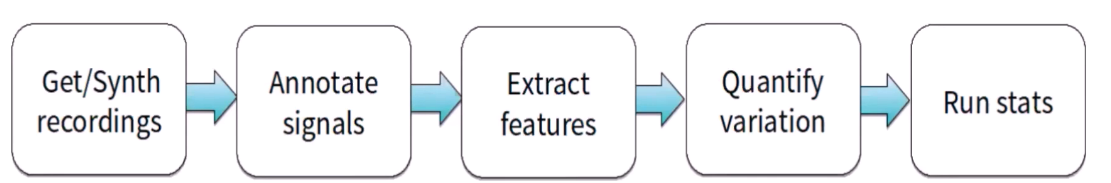

This is about statistical approaches ('classical'). The literature review I'm familiar with is about ML approaches.
Most of the problem is often the annotations, the latter steps like feature extraction can straightforward. The speaker emphasises this point.

## Annotation Format.
You give a sound file, say 5 minutes long.
For each label, we give when time the signal starts and ends. We can also give the stereo channel if it is two channel, and the sound's frequency range.

## Ohun automatic detection package
A package for detection (classification).
First we manually add labels (annotations/reference) to a subset of data.
We do this on a spectrogram. E.g.
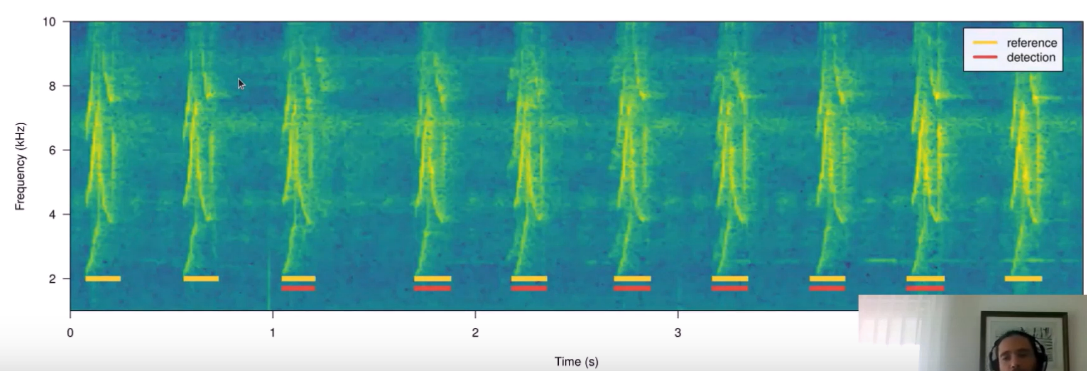

And find the detection parameters that are the best at finding these labels. Then apply it to the rest of our data as needed.

## Template-based detection
Template-based detection (TBD) uses cross correlation to tell how similar two audios are. TBD uses mel frequency or Fourier spectrograms. 

It takes a template, an example you think is similar to most other relevant signals. Then it compares the amplitude of the template with each of the steps across the recording. 

On the graph below the spectrogram, if the audio goes above the line, it implies a good match between the template and the sound in the recording. This is/can be used with a threshold. Everything above the threshold we set will be seen as a detection, and everything below ignored.

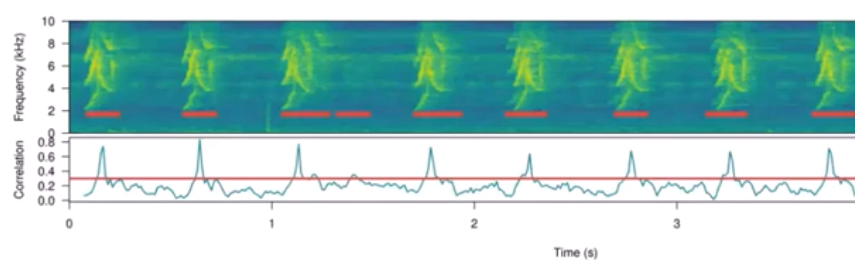

## Feature Extraction/Quantity variation

This is using the annotation format columns/data and creating new columns (features) which make classification easier.

A package warbleR has some useful features it can create.

### Spectral and Mel frequency Spectrogram features
E.g. 27 features relating to the distribution of energy in the time and frequency domain and contours. Features relating to the harmonicity (related to phase?) of the signals.
These features are like an absolute measure of the spectrogram features. Like the pitch.

### Pairwise acoustic similarity: time-frequency cross-correlation and dynamic time warping.
Spectrographic cross-correlation. A pairwise similarity metric. Unlike the previous features, these ones are about understanding the similarities (correlations) between sounds. How similar two sounds are based on their spectrogram, it's a great way to understand spectrogram structure. 

The module returns a similarity matrix. Each element correlates to how similar signals are. The diagonals are 1 because a signal is exactly the same to itself. 

## Python Packages
There are more not listed. <br>
scikit-maad for feature extraction. <br>
.biosound too.

# Work Done
- Worked on fast.ai lesson 12